<img src='../../images/course_logo_2024.jpg'/>

<div dir="rtl">
    <h1 style="text-align: center;"> תירגול 3 ריגרסיה לינארית ולוגיסטית</h1>
    <h1 style="text-align: center;"> Ex 3 Linear/Logistic Regression</h1>
    <p> Based on Matan Mor Exercise and <a hrfe=https://www.coursera.org/specializations/machine-learning-introduction> Andrew NG Machine Learning Course</a></p>
</div>

# Exercise outline
1. Regression Vs. Classification
2. Linear Regression
3. Lost and cost function
4. Gradient Decent
5. PyTorch
6. Logistic Regression


# 1.Regression Vs. Classification

<img src="../../images/classificationvsregression.png"/>

# Linear Regression

## One variable model

In [893]:
import pandas as pd
import numpy as np
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.DataFrame({'area_sq_feet': [852, 1416, 2104, 1534], 'price_in_thousands' : [178, 232, 460, 315]})

We have a training set ⬇️

In [894]:
df.sort_values(by='price_in_thousands')

,area_sq_feet,price_in_thousands
0,852,178
1,1416,232
3,1534,315
2,2104,460


Based on the training set we would like to predict the price of an apartment based on it's area:

for example what would be the the price for apartment 1000 sq feet or 200 sq feet?

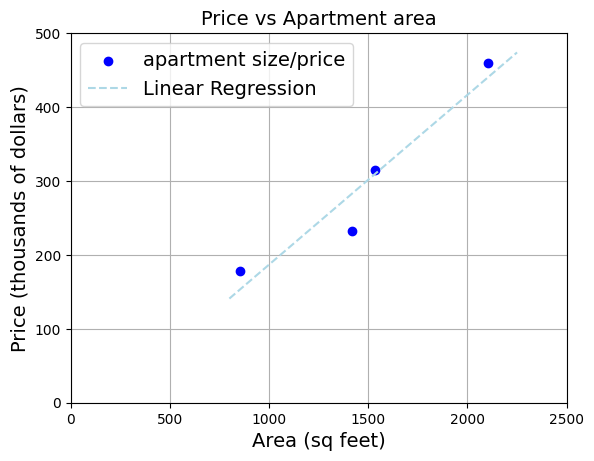

In [895]:
# Create the scatter plot
x = df[['area_sq_feet']].values
y = df[['price_in_thousands']].values

reg = LinearRegression().fit(x, y)

plt.scatter(x, y, color='blue', marker='o', label='apartment size/price')

# Show grid
plt.grid(True)

# Set labels and title
plt.xlabel('Area (sq feet)', fontsize=14)
plt.ylabel('Price (thousands of dollars)', fontsize=14)
plt.title('Price vs Apartment area', fontsize=14)

x1 = [800]
x2 = [2250]
y1, y2 = reg.predict(np.array([x1,x2]))

plt.plot([x1, x2], [y1, y2], color='lightblue', linestyle='--', label='Linear Regression')


# Set x/y-axis limits
plt.xlim(0, 2500)
plt.ylim(0, 500)


# Show legend (optional, if you have a label in the scatter plot)
plt.legend(fontsize=14, loc='upper left')

# Show the plot
plt.show()

In [896]:
print(reg.coef_)
print(reg.intercept_)

[[0.2296196]]
[-42.78334132]


**Chosen Model for this case:** <br/>
 <span style="font-size: 32px;">
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
</span>


In [897]:
@interact(w=(0.0,1,0.01), b=(-100, 100, 1))
def h(w=0, b=0):
        
    plt.scatter(x, y, color='blue', marker='o', label='apartment size/price')
    # Show grid
    plt.grid(True)
    
    # Set labels and title
    plt.xlabel('Area (sq feet)', fontsize=14)
    plt.ylabel('Price (thousands of dollars)', fontsize=14)
    plt.title('Price vs Apartment area', fontsize=14)
    
    x1 = [0]
    x2 = [2500]
    y1, y2 = w * np.array([x1,x2]) + b
    
    plt.plot([x1, x2], [y1, y2], color='lightblue', linestyle='--', label='Linear Regression')
    
    
    # Set x/y-axis limits
    plt.xlim(0, 2500)
    plt.ylim(0, 500)
    
    
    # Show legend (optional, if you have a label in the scatter plot)
    plt.legend(fontsize=14, loc='upper left')
    
    # Show the plot
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w', max=1.0, step=0.01), IntSlider(value=0, descript…


**bit of notation:**

|General  <br />  Notation   | Description| Python |
|------------| ------------------------------------------------------------|---|
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ |$w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 

## Computing Cost
The cost is a measure how well our model is predicting the target price of the house.

The equation for cost with one variable is:
<span style="font-size: 32px;">
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
  </span>
 
where 
<span style="font-size: 32px;">
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  </span>

In [898]:
df

,area_sq_feet,price_in_thousands
0,852,178
1,1416,232
2,2104,460
3,1534,315


In [899]:
df.values

array([[ 852,  178],
       [1416,  232],
       [2104,  460],
       [1534,  315]])

In [900]:
df.values[:,0]

array([ 852, 1416, 2104, 1534])

In [901]:
x = df.values[:,0].reshape(-1, 1)

In [902]:
x

array([[ 852],
       [1416],
       [2104],
       [1534]])

In [903]:
print(x.shape)
m = x.shape[0]
print(m)

(4, 1)
4


In [904]:
y = df.values[:,1].reshape(-1, 1)

In [905]:
y

array([[178],
       [232],
       [460],
       [315]])

The equation for cost with one variable is:
<span style="font-size: 32px;">
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
  </span>
 
where 
<span style="font-size: 32px;">
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  </span>

In [906]:
history = []
history_w = []
history_b = []
@interact(w=(0.0,1,0.01), b=(-100, 100, 1))
def h(w=0, b=0):
    
    plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', marker='o', label='apartment size/price')
    # Show grid
    plt.grid(True)
    
    # Set labels and title
    plt.xlabel('Area (sq feet)', fontsize=14)
    plt.ylabel('Price (thousands of dollars)', fontsize=14)
    plt.title('Price vs Apartment area', fontsize=14)
    
    x1 = [0]
    x2 = [2500]
    y1, y2 = w * np.array([x1,x2]) + b
    history.append([y1, y2])
    for item in history[-20:]:
        if item == history[-1]:
            plt.plot([x1, x2], [item[0], item[1]], color='blue', linestyle='--')
        else:
            plt.plot([x1, x2], [item[0], item[1]], color='lightblue', linestyle='--')
    
    
    # Set x/y-axis limits
    plt.xlim(0, 2500)
    plt.ylim(0, 500)
    

    # Calculate the cost
    m = x.shape[0]
    j_wb = ((x*w+b - y)**2).sum()/(2*m)
    history_w.append([w , j_wb])
    plt.subplot(1, 2, 2)
    for item in history_w[-20:]:
        if item == history_w[-1]:
            plt.scatter(item[0], item[1], color='blue', marker='o', label='apartment size/price')
        else:
            plt.scatter(item[0], item[1], color='lightblue', marker='o', label='apartment size/price')
    # Set labels and title
    plt.xlabel('w', fontsize=14)
    plt.ylabel('Cost (J_wb)', fontsize=14)
    plt.title(f'Cost {round(j_wb)}', fontsize=14)
    
    # Set x/y-axis limits
    plt.xlim(0, 0.6)
    plt.ylim(0, 100000)
    # Show the plot
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='w', max=1.0, step=0.01), IntSlider(value=0, descript…

## Gradient Decent intuition

In [323]:
w_b_comb = np.array(list(product(np.arange(0,0.5,0.01), np.arange(-200,200,1))))


In [324]:
lambda_j_wb = lambda wb: ((x*wb[0]+wb[1] - y)**2).sum()/(2*m)

In [325]:
results = np.apply_along_axis(lambda_j_wb, axis=1, arr=w_b_comb)

In [326]:
wb_cost = pd.DataFrame(w_b_comb, columns = ['w', 'b'] )

In [327]:
wb_cost['cost'] = results

In [328]:
wb_cost

,w,b,cost
0,0.00,-200.0,128791.62500
1,0.00,-199.0,128295.87500
2,0.00,-198.0,127801.12500
3,0.00,-197.0,127307.37500
4,0.00,-196.0,126814.62500
...,...,...,...
19995,0.49,195.0,200737.59165
19996,0.49,196.0,201360.32665
19997,0.49,197.0,201984.06165
19998,0.49,198.0,202608.79665


In [341]:
wb_cost.pivot(columns ='b',index = 'w',values = 'cost').head()

b,-200.0,-199.0,-198.0,-197.0,-196.0,-195.0,-194.0,-193.0,-192.0,-191.0,...,190.0,191.0,192.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0
w,,,,,,,,,,,,,,,,,,,,,
0.00,128791.62500,128295.87500,127801.12500,127307.37500,126814.62500,126322.87500,125832.12500,125342.37500,124853.62500,124365.87500,...,11304.12500,11198.37500,11093.62500,10989.87500,10887.12500,10785.37500,10684.62500,10584.87500,10486.12500,10388.37500
0.01,121129.46665,120648.48165,120168.49665,119689.51165,119211.52665,118734.54165,118258.55665,117783.57165,117309.58665,116836.60165,...,9400.31665,9309.33165,9219.34665,9130.36165,9042.37665,8955.39165,8869.40665,8784.42165,8700.43665,8617.45165
0.02,113705.08160,113238.86160,112773.64160,112309.42160,111846.20160,111383.98160,110922.76160,110462.54160,110003.32160,109545.10160,...,7734.28160,7658.06160,7582.84160,7508.62160,7435.40160,7363.18160,7291.96160,7221.74160,7152.52160,7084.30160
0.03,106518.46985,106067.01485,105616.55985,105167.10485,104718.64985,104271.19485,103824.73985,103379.28485,102934.82985,102491.37485,...,6306.01985,6244.56485,6184.10985,6124.65485,6066.19985,6008.74485,5952.28985,5896.83485,5842.37985,5788.92485
0.04,99569.63140,99132.94140,98697.25140,98262.56140,97828.87140,97396.18140,96964.49140,96533.80140,96104.11140,95675.42140,...,5115.53140,5068.84140,5023.15140,4978.46140,4934.77140,4892.08140,4850.39140,4809.70140,4770.01140,4731.32140


In [330]:
z_cost = wb_cost.pivot(columns ='b',index = 'w',values = 'cost').values

In [331]:
z_cost.shape

(50, 400)

In [332]:
import plotly.graph_objects as go

# np.arange(0,0.5,0.1), np.arange(-200,200,1)
fig = go.Figure(data=
    go.Contour(
        dx=1,
        x0=-200,
        dy=0.01,
        y0=1,
        z=z_cost,
        contours_coloring='lines',
        line_width=2,
    ),

)

fig.show(renderer="colab")

In [340]:
z = z_cost
sh_0, sh_1 = z_cost.shape
x, y = np.arange(0,0.5,0.01),  np.arange(-200,200,1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Gradient descent', autosize=False,
                  width=800, height=800)
# fig.update_xaxes(
#         title_text = "Month")

# fig.update_yaxes(
#         title_text = "W")
fig.update_layout(scene=dict(xaxis_title='w', yaxis_title='b', zaxis_title='J_WB cost'))

fig.show(renderer="colab")

### Putting it all togehter
**We want to minimize the Cost function**
1. Choose a linear regression model:$$f_{w,b}(x) = wx + b$$
2. select some arbitrary w, b values [e.g (0,0)] and select a learning rate (alpha)
3. Run number of iterations or untill Cost is minimized
3. 1.  calculate cost function (**cost_function**)
   2.  calculate partial derivates for w and b (**compute_gradient**)
   3.  update w, b with the derivaties multiplied with alpha

**Cost Function**
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 


**gradient descent**:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [796]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 

    #Solve without Matrix and vectors
    # cost = 0
    
    # for i in range(m):
    #     f_wb = w * x[i] + b
    #     cost = cost + (f_wb - y[i])**2
    # total_cost = 1 / (2 * m) * cost
    total_cost = ((x.dot(w) + b - y)**2).sum()/(2*m)

    return total_cost

In [797]:
x_train = df.values[:,0].reshape(-1, 1)
y_train = df.values[:,1].reshape(-1, 1)

In [798]:
w = np.array([[0]])
b = 0

In [799]:
compute_cost(x_train, y_train, w, b)

49541.625

In [800]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]  

    # Solve without matix and vectors
    # dj_dw = 0
    # dj_db = 0
    
    # for i in range(m):  
    #     f_wb = w * x[i] + b 
    #     dj_dw_i = (f_wb - y[i]) * x[i] 
    #     dj_db_i = f_wb - y[i] 
    #     dj_db += dj_db_i
    #     dj_dw += dj_dw_i 
    # dj_dw = dj_dw / m 
    # dj_db = dj_db / m 
    
    f_wb = x.dot(w) + b
    dj_dw = x.T.dot(f_wb - y) / m
    dj_db = (f_wb - y).sum() / m
    
    return dj_dw, dj_db

In [801]:
for i in range(20):
    dj_dw, dj_db =  compute_gradient(x_train,y_train,w,b)
    a = 0.0000001
    w = w -  a*dj_dw
    b = b - a*dj_db
    cost = compute_cost(x_train, y_train, w, b)
    print(f'Iteration {i}: cost {round(cost,1)}')
print(w,b)

Iteration 0: cost 29002.8
Iteration 1: cost 17070.0
Iteration 2: cost 10137.2
Iteration 3: cost 6109.3
Iteration 4: cost 3769.1
Iteration 5: cost 2409.5
Iteration 6: cost 1619.6
Iteration 7: cost 1160.7
Iteration 8: cost 894.0
Iteration 9: cost 739.1
Iteration 10: cost 649.1
Iteration 11: cost 596.8
Iteration 12: cost 566.4
Iteration 13: cost 548.8
Iteration 14: cost 538.5
Iteration 15: cost 532.6
Iteration 16: cost 529.1
Iteration 17: cost 527.1
Iteration 18: cost 525.9
Iteration 19: cost 525.2
[[0.20216258]] 0.0001184229339785026


In [802]:
f_wb = x_train.dot(w) + b

In [803]:
x.T.dot(f_wb - y)

array([[-8462.79574206]])

## Number of parameters

In [817]:
df_2 = pd.DataFrame({'floor' : [1,2,3,4], 'rooms': [3,4,4,5], 'building_age': [10,30,25,15], 'apartment_area': [2104, 1416, 1534, 852], 'price': [460,232,315, 178]})

In [818]:
df_2

,floor,rooms,building_age,apartment_area,price
0,1,3,10,2104,460
1,2,4,30,1416,232
2,3,4,25,1534,315
3,4,5,15,852,178


In [819]:
df_2['price'].values.reshape(-1,1)

array([[460],
       [232],
       [315],
       [178]])

In [820]:
y_train_2 = df_2['price'].values.reshape(-1,1)

In [821]:
df_2.drop(columns='price').values

array([[   1,    3,   10, 2104],
       [   2,    4,   30, 1416],
       [   3,    4,   25, 1534],
       [   4,    5,   15,  852]])

In [822]:
x_train_2 = df_2.drop(columns='price').values

$$ f_{w,b}(x) = w_1x_1 + w_2x_2 + ... + w_nx_n + b $$

In [823]:
w_2 = np.zeros((4,1))
b_2 = 0

In [824]:
compute_cost(x_train_2, y_train_2, w_2, b_2)

49541.625

In [825]:
compute_gradient(x_train_2, y_train_2, w_2, b_2)

(array([[   -645.25],
        [  -1114.5 ],
        [  -5526.25],
        [-482804.5 ]]),
 -296.25)

In [826]:
w_2

array([[0.],
       [0.],
       [0.],
       [0.]])

In [827]:
for i in range(15):
    dj_dw, dj_db =  compute_gradient(x_train_2, y_train_2, w_2, b_2)
    a = 0.0000001
    w_2 = w_2 -  a*dj_dw
    b_2 = b_2 - a*dj_db
    cost = compute_cost(x_train_2, y_train_2, w_2, b_2)
    print(f'Iteration {i}: cost {round(cost,1)}')

Iteration 0: cost 29000.4
Iteration 1: cost 17067.4
Iteration 2: cost 10135.0
Iteration 3: cost 6107.8
Iteration 4: cost 3768.2
Iteration 5: cost 2409.1
Iteration 6: cost 1619.5
Iteration 7: cost 1160.8
Iteration 8: cost 894.4
Iteration 9: cost 739.5
Iteration 10: cost 649.6
Iteration 11: cost 597.4
Iteration 12: cost 567.0
Iteration 13: cost 549.4
Iteration 14: cost 539.1


## Polynom

In [863]:
def noise(x, scale): 
    return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): 
    return x * (1+noise(x,mult)) + noise(x,add)
    
np.random.seed(42)

x = np.linspace(-2, 2,20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

In [864]:
y

array([[11.86903726],
       [ 6.54328436],
       [ 5.93960658],
       [ 2.63037003],
       [ 1.79474121],
       [ 1.90102867],
       [-0.29773756],
       [ 1.43154529],
       [-0.28038047],
       [ 0.45212987],
       [ 0.25474983],
       [ 4.57428419],
       [ 2.96807108],
       [ 1.33854384],
       [ 5.37544094],
       [ 4.88777899],
       [ 8.24667599],
       [ 9.24615397],
       [10.26118715],
       [13.69391742]])

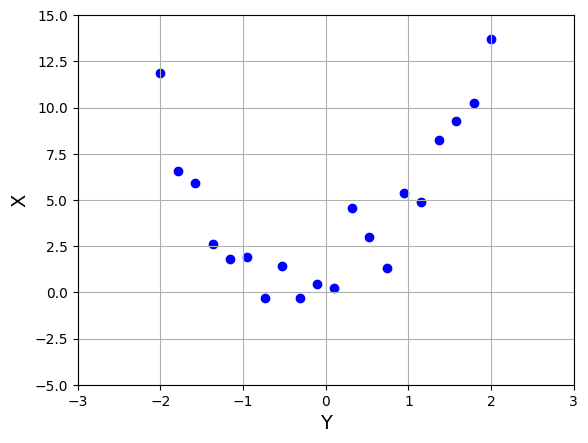

In [866]:
    
plt.scatter(x, y, color='blue', marker='o')
# Show grid
plt.grid(True)

# Set labels and title
plt.xlabel('Y', fontsize=14)
plt.ylabel('X', fontsize=14)

# Set x/y-axis limits
plt.xlim(-3, 3)
plt.ylim(-5, 15)


# Show legend (optional, if you have a label in the scatter plot)

# Show the plot
plt.show()

$$ f_{w,b}(x) = w_1x_1^2 + w_2x_2 + b $$

In [868]:
m = x.shape[0]
np.hstack([x**2, x])

array([[ 4.        , -2.        ],
       [ 3.20221607, -1.78947368],
       [ 2.49307479, -1.57894737],
       [ 1.87257618, -1.36842105],
       [ 1.34072022, -1.15789474],
       [ 0.89750693, -0.94736842],
       [ 0.54293629, -0.73684211],
       [ 0.27700831, -0.52631579],
       [ 0.09972299, -0.31578947],
       [ 0.01108033, -0.10526316],
       [ 0.01108033,  0.10526316],
       [ 0.09972299,  0.31578947],
       [ 0.27700831,  0.52631579],
       [ 0.54293629,  0.73684211],
       [ 0.89750693,  0.94736842],
       [ 1.34072022,  1.15789474],
       [ 1.87257618,  1.36842105],
       [ 2.49307479,  1.57894737],
       [ 3.20221607,  1.78947368],
       [ 4.        ,  2.        ]])

In [879]:
y_train_3 = y

In [880]:
x_train_3 = np.hstack([x**2, x])

In [881]:
w_3 = np.zeros((2,1))
b_3 = 1

In [882]:
x_train_3

array([[ 4.        , -2.        ],
       [ 3.20221607, -1.78947368],
       [ 2.49307479, -1.57894737],
       [ 1.87257618, -1.36842105],
       [ 1.34072022, -1.15789474],
       [ 0.89750693, -0.94736842],
       [ 0.54293629, -0.73684211],
       [ 0.27700831, -0.52631579],
       [ 0.09972299, -0.31578947],
       [ 0.01108033, -0.10526316],
       [ 0.01108033,  0.10526316],
       [ 0.09972299,  0.31578947],
       [ 0.27700831,  0.52631579],
       [ 0.54293629,  0.73684211],
       [ 0.89750693,  0.94736842],
       [ 1.34072022,  1.15789474],
       [ 1.87257618,  1.36842105],
       [ 2.49307479,  1.57894737],
       [ 3.20221607,  1.78947368],
       [ 4.        ,  2.        ]])

In [883]:
for i in range(15):
    dj_dw, dj_db =  compute_gradient(x_train_3, y_train_3, w_3, b_3)
    a = 0.1
    w_3 = w_3 -  a*dj_dw
    b_3 = b_3 - a*dj_db
    cost = compute_cost(x_train_3, y_train_3, w_3, b_3)
    print(f'Iteration {i}: cost {round(cost,1)}')

Iteration 0: cost 5.8
Iteration 1: cost 2.9
Iteration 2: cost 1.9
Iteration 3: cost 1.5
Iteration 4: cost 1.3
Iteration 5: cost 1.3
Iteration 6: cost 1.2
Iteration 7: cost 1.1
Iteration 8: cost 1.1
Iteration 9: cost 1.1
Iteration 10: cost 1.0
Iteration 11: cost 1.0
Iteration 12: cost 1.0
Iteration 13: cost 1.0
Iteration 14: cost 1.0


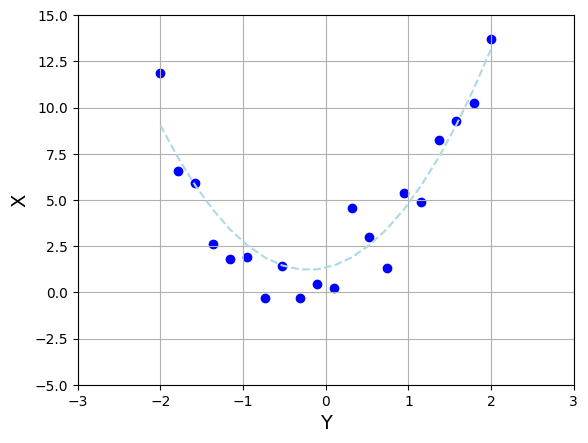

In [892]:
    
plt.scatter(x, y, color='blue', marker='o')
plt.plot(x, x_train_3.dot(w_3)+b_3, color='lightblue', linestyle='--', label='Polynomial Regression')
# Show grid
plt.grid(True)

# Set labels and title
plt.xlabel('Y', fontsize=14)
plt.ylabel('X', fontsize=14)

# Set x/y-axis limits
plt.xlim(-3, 3)
plt.ylim(-5, 15)


# Show legend (optional, if you have a label in the scatter plot)

# Show the plot
plt.show()

In [890]:
x_train_3

array([[ 4.        , -2.        ],
       [ 3.20221607, -1.78947368],
       [ 2.49307479, -1.57894737],
       [ 1.87257618, -1.36842105],
       [ 1.34072022, -1.15789474],
       [ 0.89750693, -0.94736842],
       [ 0.54293629, -0.73684211],
       [ 0.27700831, -0.52631579],
       [ 0.09972299, -0.31578947],
       [ 0.01108033, -0.10526316],
       [ 0.01108033,  0.10526316],
       [ 0.09972299,  0.31578947],
       [ 0.27700831,  0.52631579],
       [ 0.54293629,  0.73684211],
       [ 0.89750693,  0.94736842],
       [ 1.34072022,  1.15789474],
       [ 1.87257618,  1.36842105],
       [ 2.49307479,  1.57894737],
       [ 3.20221607,  1.78947368],
       [ 4.        ,  2.        ]])

## Some extra tips
1. Feature scaling can make model be more robust, and also improve performance
2. 

<img src='../../images/learning_rate.png' width=800/>